In [1]:
import os

test_dir = "/content/drive/MyDrive/AI ML/Worksheet 5/FruitinAmazon/test"
train_dir = "/content/drive/MyDrive/AI ML/Worksheet 5/FruitinAmazon/train"

class_names = sorted(os.listdir(train_dir))

if not class_names:
    print("No class directories found in the train folder")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [2]:
# check for the corrupted files

from PIL import Image, UnidentifiedImageError

corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

if corrupted_images:
    print("Currupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("No corrupted images found!")

No corrupted images found!


In [3]:
class_count = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        class_count[class_name] = len(images)

print("Class Distribution")
print("=" * 45)

print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)

for class_name, count in class_count.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)

Class Distribution
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


## **Visualization**

In [4]:
import random

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir,class_name)

    if(os.path.isdir(class_path)):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', 'jpeg'))]

        if images:
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

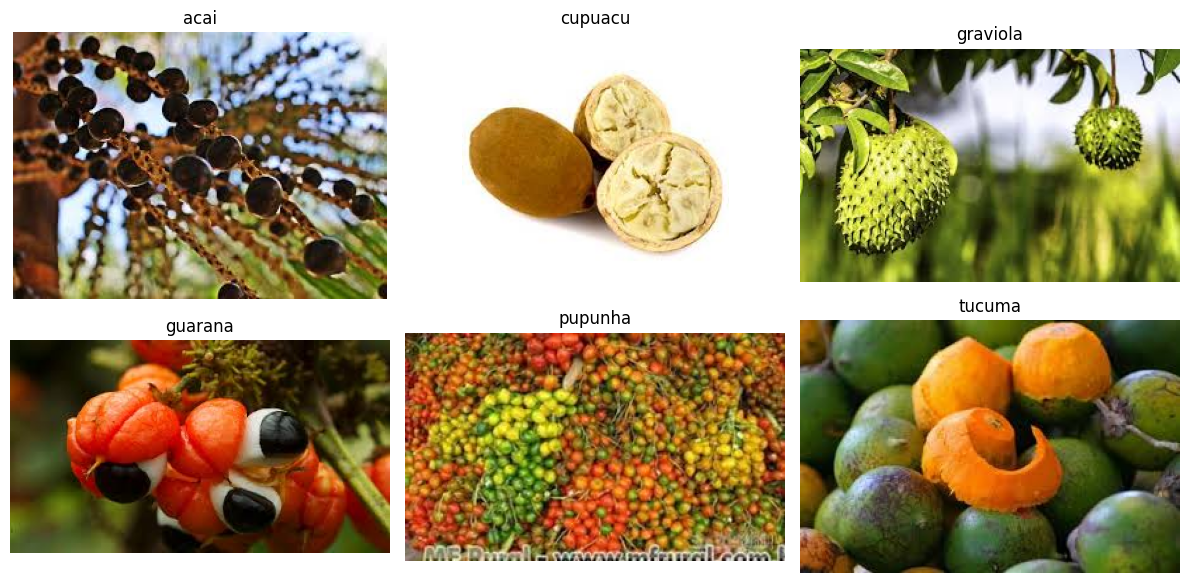

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

num_classes = len(selected_images)

cols = (num_classes + 1) // 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12,6))

for i, ax in enumerate(axes.flat):

    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)

        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [6]:
devnagari_train_dir = '/content/drive/MyDrive/AI ML/Worksheet 4/DevanagariHandwrittenDigitDataset/Train'
devnagari_test_dir = '/content/drive/MyDrive/AI ML/Worksheet 4/DevanagariHandwrittenDigitDataset/Test'

In [7]:
from tensorflow import keras
from keras.preprocessing import image_dataset_from_directory

img_size = (28, 28)
batch_size = 32

dev_train_ds, dev_val_ds = keras.utils.image_dataset_from_directory(
    devnagari_train_dir,
    validation_split = 0.2,
    subset = 'both',
    seed = 1337,
    image_size = img_size,
    batch_size = batch_size
)

Found 17000 files belonging to 10 classes.
Using 13600 files for training.
Using 3400 files for validation.


In [8]:
for images, labels in dev_train_ds.take(1):
    print("Image shape: ", images.shape)
    print("Labels shape: ", labels.shape)

Image shape:  (32, 28, 28, 3)
Labels shape:  (32,)


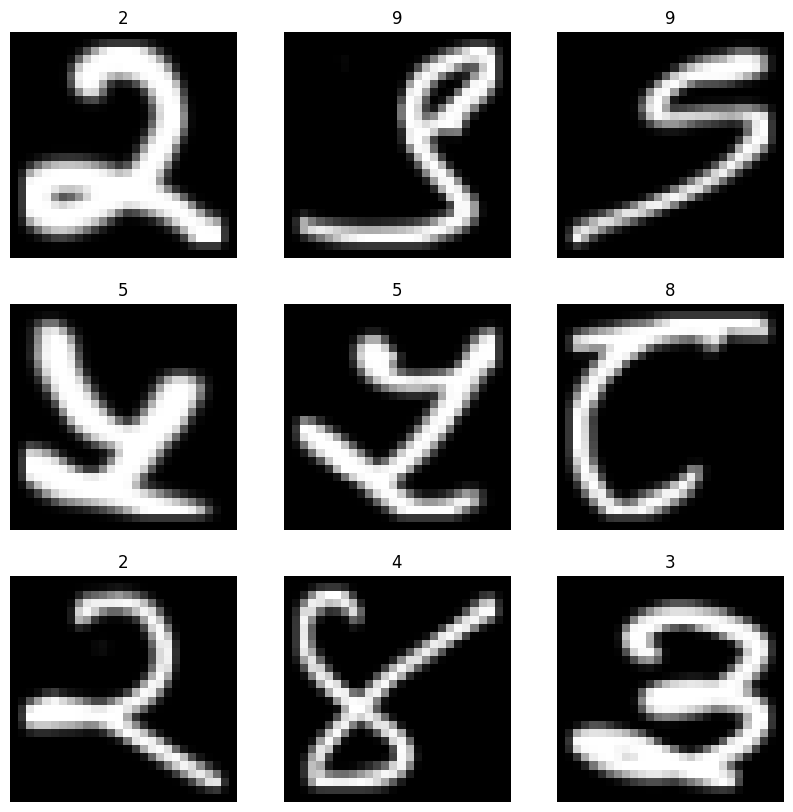

In [9]:
import numpy as np

plt.figure(figsize=(10,10))

for images, labels in dev_train_ds.take(1):

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## **Using Keras ImageDataGenerator**

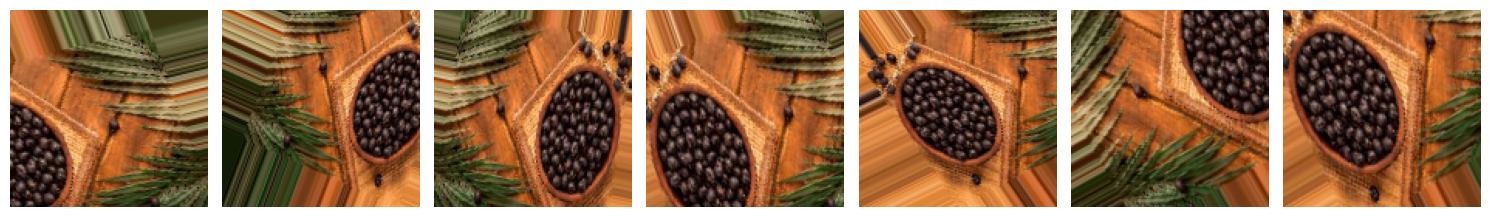

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Define the data generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

img = image.load_img('/content/drive/MyDrive/AI ML/Worksheet 5/FruitinAmazon/train/acai/images (1).jpeg', target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

aug_iter = datagen.flow(x, batch_size=1)
images = [next(aug_iter)[0].astype('uint8') for _ in range(7)]

fig, ax = plt.subplots(1, 7, figsize=(15, 5))
for i in range(7):
    ax[i].imshow(images[i])
    ax[i].axis('off')

plt.tight_layout()
plt.show()


In [11]:
#  New API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import RandomRotation, RandomFlip

data_augementation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
]

def data_augementation(images):

    for layer in data_augementation_layers:
        images = layer(images)

    return images

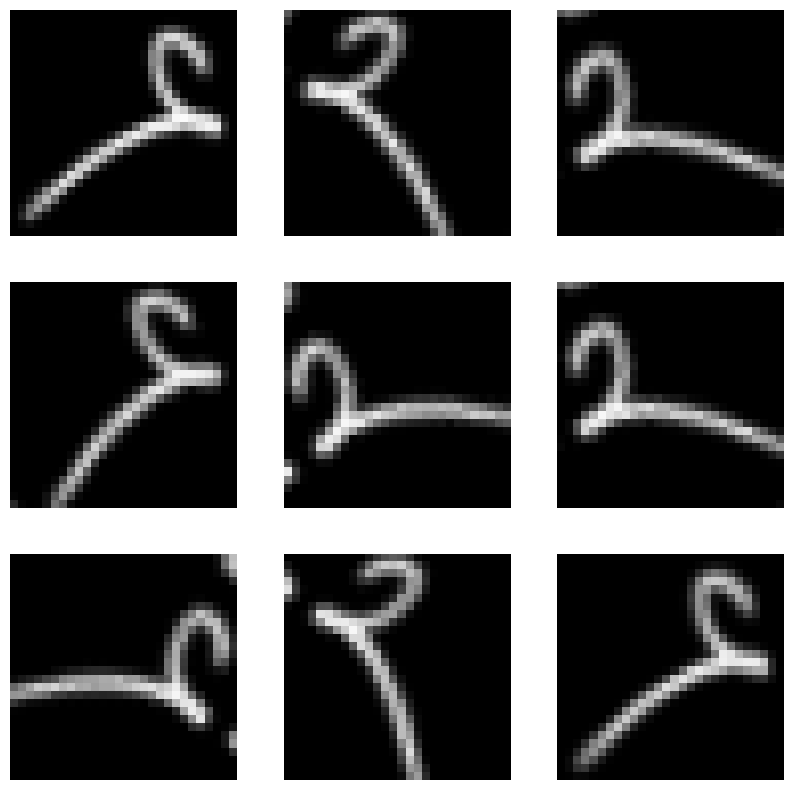

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in dev_train_ds.take(1):
    for i in range(9):
        augmented_images = data_augementation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Define a simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(dev_train_ds, epochs=5, batch_size=32, validation_data=dev_val_ds)

# Evaluate the model
test_loss, test_acc = model.evaluate(dev_train_ds)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
  5/425 ━━━━━━━━━━━━━━━━━━━━ 1:35:47 14s/step - accuracy: 0.2050 - loss: 54.0641

In [ ]:
# Make predictions
predictions = model.predict(dev_train_ds[:5])
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Activation, MaxPooling2D,
    Dropout, Flatten, Dense
)

# Define data augmentation as a list of preprocessing layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

# Wrap augmentation layers inside a function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# Define the model using Sequential API
model = Sequential([
    # Apply data augmentation using a Lambda layer
    layers.Lambda(data_augmentation, input_shape=(224, 224, 3)),

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1.0 / 255),

    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer for 10-class classification
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer class labels
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# **Fine Tuning**

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Reduces dimensions (height, width) to a single vector per image
x = Dense(1024, activation='relu')(x) # Fully connected layer with 1024 neurons
x = Dense(10, activation='softmax')(x) # Output layer for 10 classes (with softmax for multi-class classification)

In [ ]:
from tensorflow.keras.models import Model
# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()